In [536]:
import pandas as pd
import matplotlib.pyplot as plt

In [537]:
train_df = pd.read_csv('train.csv', header=0)

In [538]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [539]:
train_df = train_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Embarked'], axis = 1)

In [540]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
Fare        891 non-null float64
Cabin       204 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 41.8+ KB


Now try to find the relationship between chance of survive and passenger's class

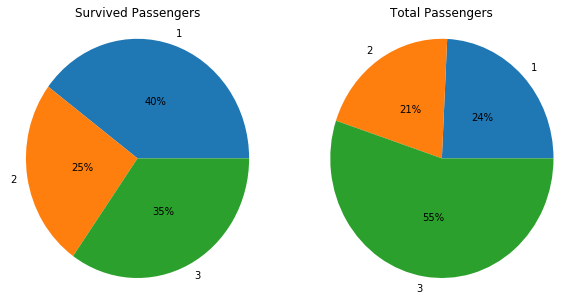

,PassengerNum,Pclass,Survived,Ratio
Pclass,,,,
1,216,1,136,0.629630
2,184,2,87,0.472826
3,491,3,119,0.242363


In [541]:
PS = pd.DataFrame()

PS['PassengerNum'] = train_df[['Pclass','Survived']].groupby(['Pclass'])['Survived'].count()
PS['Pclass'] = PS.index.values
PS['Survived'] = train_df[['Pclass','Survived']].groupby(['Pclass'])['Survived'].sum()
PS['Ratio'] = PS.Survived / PS.PassengerNum

plt.figure(figsize= (10, 5))
plt.subplot (121)
plt.pie(PS['Survived'], labels= PS['Pclass'], pctdistance=0.5, radius=1.1, autopct='%1.0f%%')
plt.title('Survived Passengers')

plt.subplot (122)
plt.pie(PS['PassengerNum'], labels= PS['Pclass'], pctdistance= 0.5, radius=1.1, autopct='%1.0f%%')
plt.title('Total Passengers')

plt.show()

PS

# From above figure and table, we can easily found that the first class passenger have the highest chance surviving and the surviving ratio is decrease with the tclass of ticket.

Now try to find the relationship between chance of survive and passenger's age

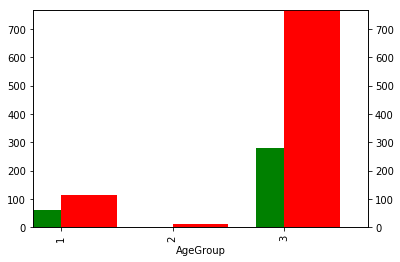

,PassengerNum,AgeGroup,Survived,Ratio
AgeGroup,,,,
1,113,1,61,0.539823
2,11,2,1,0.090909
3,767,3,280,0.365059


In [542]:
df['AgeGroup'] = 0

def f(row):
    if row['Age'] < 18:
        val = 1
    elif row['Age'] >= 65:
        val = 2
    else:
        val = 3
    return val

df['AgeGroup'] = df.apply(f,axis=1)

AG = pd.DataFrame()
AG['PassengerNum'] = df[['AgeGroup','Survived']].groupby(['AgeGroup'])['Survived'].count()
AG['AgeGroup'] = AG.index.values
AG['Survived'] = df[['AgeGroup','Survived']].groupby(['AgeGroup'])['Survived'].sum()
AG['Ratio'] = AG.Survived / AG.PassengerNum

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.5

AG.Survived.plot(kind='bar', color='green', ax=ax)
AG.PassengerNum.plot(kind='bar', color='red', ax=ax2, width=width, position=0)

ax.set_ylim(0,max(AG.PassengerNum))
ax2.set_ylim(0,max(AG.PassengerNum))

plt.show()
AG

# From above figure and table, we can easily found children have highest surviving ratio and lowest chance was given to the elder.

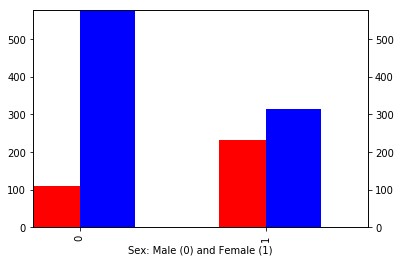

,Survivor,Gender,PassengerNum,Ratio
Gender,,,,
0,109,0,577,18.890815
1,233,1,314,74.203822


In [543]:
GE = pd.DataFrame()


GE['PassengerNum'] = train_df[['Survived','Sex']].groupby(['Sex'])['Survived'].count()
GE['Gender'] = GE.index.get_level_values(0)
GE['Gender'] = GE.Gender.map({'female' : 1, 'male' : 0}).astype(int)
GE['Survived'] = train_df[['Survived','Sex']].groupby(['Sex'])['Survived'].sum()
                                                           
GE2 = pd.DataFrame()
                                                           
GE2['Survivor'] = GE[['Survived','Gender']].groupby(['Gender'])['Survived'].sum()
GE2['Gender'] = GE2.index.values
GE2['PassengerNum'] = GE[['PassengerNum','Gender']].groupby(['Gender'])['PassengerNum'].sum()
GE2['Ratio'] = GE2.Survivor / GE2.PassengerNum * 100

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width =0.3

GE2.Survivor.plot(kind='bar', color='red', ax=ax)
GE2.PassengerNum.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylim(0,max(GE2.PassengerNum))
ax2.set_ylim(0,max(GE2.PassengerNum))
ax.set_xlabel('Sex: Male (0) and Female (1)')

plt.show()
GE2

#  Therefore from the graph and table above, we cam found that the female's survived rate is more great than male.

Now try to find how traveling with family member will affects the surviving ratio

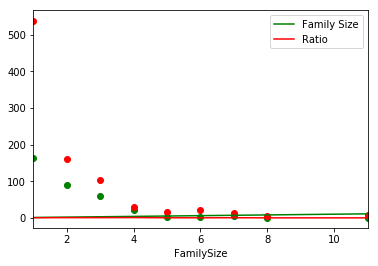

,PassengerNum,FamSize,Survived,Ratio
FamilySize,,,,
1,537,1,163,0.303538
2,161,2,89,0.552795
3,102,3,59,0.578431
4,29,4,21,0.724138
5,15,5,3,0.200000
6,22,6,3,0.136364
7,12,7,4,0.333333
8,6,8,0,0.000000
11,7,11,0,0.000000


In [544]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

FM = pd.DataFrame()
FM['PassengerNum'] = df[['FamilySize','Survived']].groupby(['FamilySize'])['Survived'].count()
FM['FamSize'] = FM.index.values
FM['Survived'] = df[['FamilySize','Survived']].groupby(['FamilySize'])['Survived'].sum()
FM['Ratio'] = FM.Survived / FM.PassengerNum

fig = plt.figure()
ax = fig.add_subplot(111)

width = 1

FM.FamSize.plot(kind='line', color='green', ax=ax, label = 'Family Size')
FM.Ratio.plot(kind='line', color='red', ax=ax, label = 'Ratio')
ax.legend()

ax.scatter(FM.FamSize,FM.Survived, color='green')
ax.scatter(FM.FamSize,FM.PassengerNum, color='red')

plt.show()
FM

# Therefore, from the figure and table above, we can found that famililes have 4 members have the highest chance to survive and family member between 2-4 will have advantageous for survival. While almost no member survived in biggest families. 

Now try to find the relationship between passenger's cabin and chance of survive

In [545]:
df.loc[df['Cabin'].notnull(), 'Cabin Index'] = df['Cabin'].str[0]

CB = pd.DataFrame()
CB['PassengerNum'] = df[['Cabin Index','Survived']].groupby(['Cabin Index'])['Survived'].count()
CB['Survived'] = df[['Cabin Index','Survived']].groupby(['Cabin Index'])['Survived'].sum()
CB['Ratio'] = CB.Survived / CB.PassengerNum 
CB

,PassengerNum,Survived,Ratio
Cabin Index,,,
A,15,7,0.466667
B,47,35,0.744681
C,59,35,0.593220
D,33,25,0.757576
E,32,24,0.750000
F,13,8,0.615385
G,4,2,0.500000
T,1,0,0.000000


# Therefore, from above table, the passenger from cabin B,D and E have the highest suviving ratio. But it is lost so many datas from cabin columns.

In [546]:
S = pd.DataFrame()
D = pd.DataFrame()

S = df[df.Survived==1]
D = df[df.Survived==0]


print('Most survivor are:')
print()
print('From Class: ', S['Pclass'].value_counts(sort=True).index[0])
print('Have the gender: ', S['Sex'].value_counts(sort=True).index[0])


if S['AgeGroup'].value_counts(sort=True).index[0] == 1:
    u = 'children'
else: 
    if S['AgeGroup'].value_counts(sort=True).index[0] == 2:
        u = 'elderly'
    else: u ='adult'

print('In the age group: ',u)
print('Be with a family of: ',S['FamilySize'].value_counts(sort=True).index[0],'people')
print('In the cabin: ',S['Cabin Index'].value_counts(sort=True).index[0])
print()


print('Most people that did not survive are:')
print()
print('From Class: ', D['Pclass'].value_counts(sort=True).index[0])
print('Have the gender: ', D['Sex'].value_counts(sort=True).index[0])

if D['AgeGroup'].value_counts(sort=True).index[0] == 1:
    u = 'children'
else: 
    if D['AgeGroup'].value_counts(sort=True).index[0] == 3:
        u = 'adult'
    else: u ='elderly'

print('In the age group: ',u)
print('Be with a family of: ',D['FamilySize'].value_counts(sort=True).index[0],'people')
print('In the cabin: ',D['Cabin Index'].value_counts(sort=True).index[0])

Most survivor are:

From Class:  1
Have the gender:  female
In the age group:  adult
Be with a family of:  1 people
In the cabin:  C

Most people that did not survive are:

From Class:  3
Have the gender:  male
In the age group:  adult
Be with a family of:  1 people
In the cabin:  C


#  conclusion:
1. Most of survivals are whom is female, children, traveling with 2-4 family member and the people from first class
2. Most of died are whom is elder, male and single and the prople from third class.